In [38]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings("ignore")

X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


### Logistic Regression
estimator_log_Reg = LogisticRegression()
estimator_log_Reg.fit(X,y)

### Decision Tree
estimator_DT = GradientBoostingClassifier()
estimator_DT.fit(X,y)
### Support Vector Machine
estimator_SVC = SVC(kernel='rbf', gamma=1000)
estimator_SVC.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Logistic Regression

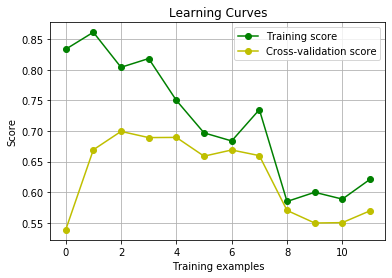

In [39]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
    
draw_learning_curves(X, y, estimator_log_Reg, 12)

# Decision Tree

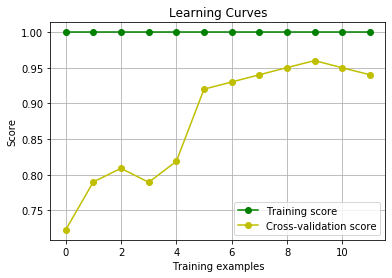

In [40]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
    
draw_learning_curves(X, y, estimator_DT, 12)

# Support Vector Machine

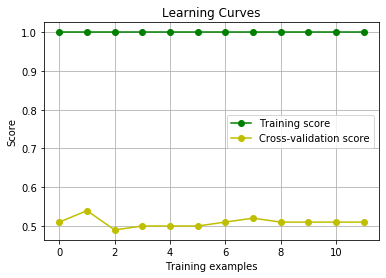

In [41]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
    
draw_learning_curves(X, y, estimator_SVC, 12)

We can observe from the curves that:

# The Logistic Regression model has a low training and testing score.
# The Decision Tree model has a high training and testing score.
# he Support Vector Machine model has a high training score, and a low testing score.


From here, we can determine that the Logistic Regression model underfits, the SVM model overfits, and the Decision Tree model is just right.

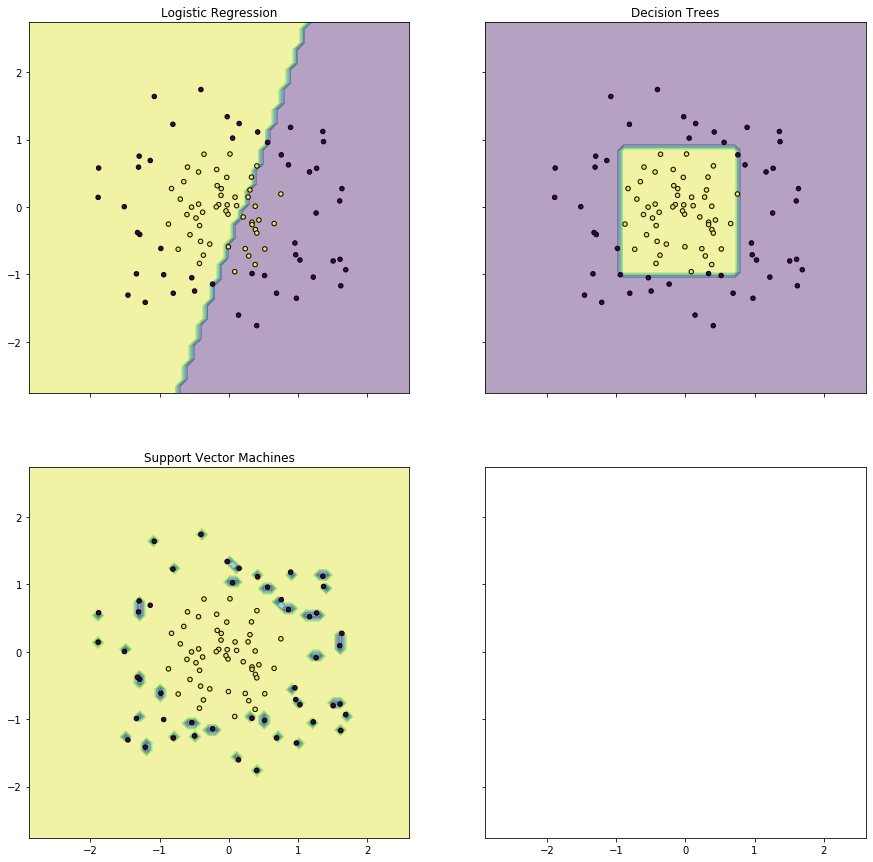

In [49]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(15,15))

for idx, clf, tt in zip(product([0, 1], [0, 1]),[estimator_log_Reg,estimator_DT,estimator_SVC],['Logistic Regression','Decision Trees','Support Vector Machines']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

When we look at the models above, does it make sense that the first one underfits, the second one is right, and the third one overfits? It does, right? We can see that the data is correctly bounded by a circle, or a square. What our models do, is the following:

The Logistic Regression model uses a line, which is too simplistic. It doesn't do very well on the training set. Thus, it underfits.
The Decision Tree model uses a square, which is a pretty good fit, and generalizes well. Thus, this model is good.
The Support Vector Machine model actually draws a tiny circle around each point. This is clearly just memorizing the training set, and won't generalize well. Thus, it overfits.